In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
data=pd.read_csv("/content/loan_default_risk_dataset.csv")

In [3]:
data.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
0,60.0,2996.52,2378.49,0
1,66.4,4137.23,1538.92,1
2,58.5,19865.75,2434.80,1
3,49.8,16855.70,2677.82,1
4,67.3,7902.37,2206.72,0


In [4]:
data.describe()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
count,300.000000,299.000000,298.000000,300.000000
mean,64.929667,15704.173946,2037.318792,0.500000
std,9.579529,26708.540635,497.609170,0.500835
min,26.500000,417.390000,651.560000,0.000000
25%,58.700000,3460.475000,1713.535000,0.000000
50%,64.400000,7920.270000,2014.520000,0.500000
75%,71.825000,16894.185000,2352.947500,1.000000
max,84.900000,326001.400000,3316.190000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retirement_Age     300 non-null    float64
 1   Debt_Amount        299 non-null    float64
 2   Monthly_Savings    298 non-null    float64
 3   Loan_Default_Risk  300 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


In [6]:
# @title find missing and duplicate values
missing=data.isnull().sum()
missing

,0
Retirement_Age,0
Debt_Amount,1
Monthly_Savings,2
Loan_Default_Risk,0


In [7]:
#handle missing values
data['Debt_Amount']=data['Debt_Amount'].fillna(data['Debt_Amount'].mean())
data['Monthly_Savings']=data['Monthly_Savings'].fillna(data['Monthly_Savings'].mean())

#recheck missing values
data.isnull().sum()

,0
Retirement_Age,0
Debt_Amount,0
Monthly_Savings,0
Loan_Default_Risk,0


In [8]:
#duplicate values check
duplicate=data.duplicated().sum()
duplicate

0

In [9]:
# @title EDA

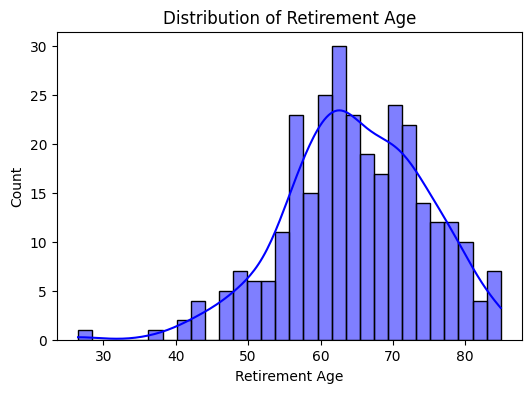

In [10]:
# Plot histogram
plt.figure(figsize=(6,4))
sns.histplot(data['Retirement_Age'], bins=30, kde=True, color="blue")
plt.title("Distribution of Retirement Age")
plt.xlabel("Retirement Age")
plt.ylabel("Count")
plt.show()

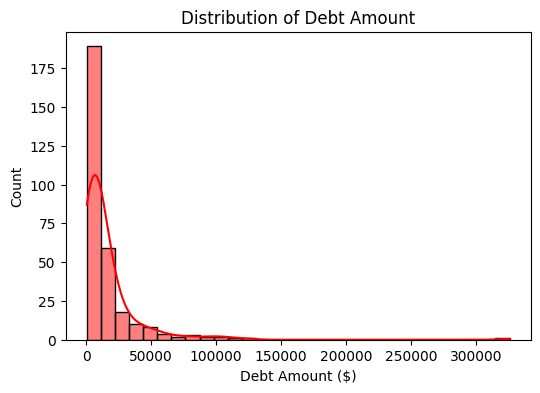

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data['Debt_Amount'], bins=30, kde=True, color="red")
plt.title("Distribution of Debt Amount")
plt.xlabel("Debt Amount ($)")
plt.ylabel("Count")
plt.show()

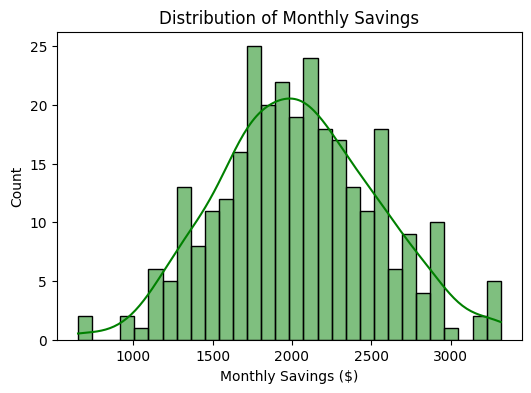

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(data['Monthly_Savings'], bins=30, kde=True, color="green")
plt.title("Distribution of Monthly Savings")
plt.xlabel("Monthly Savings ($)")
plt.ylabel("Count")
plt.show()

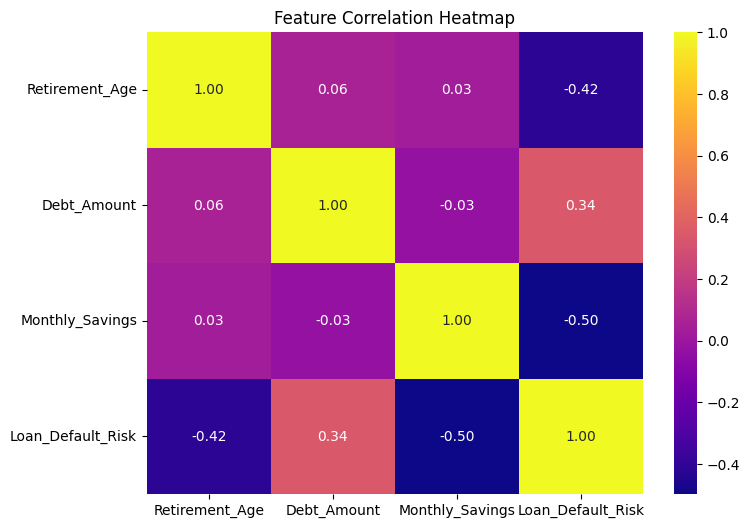

In [13]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

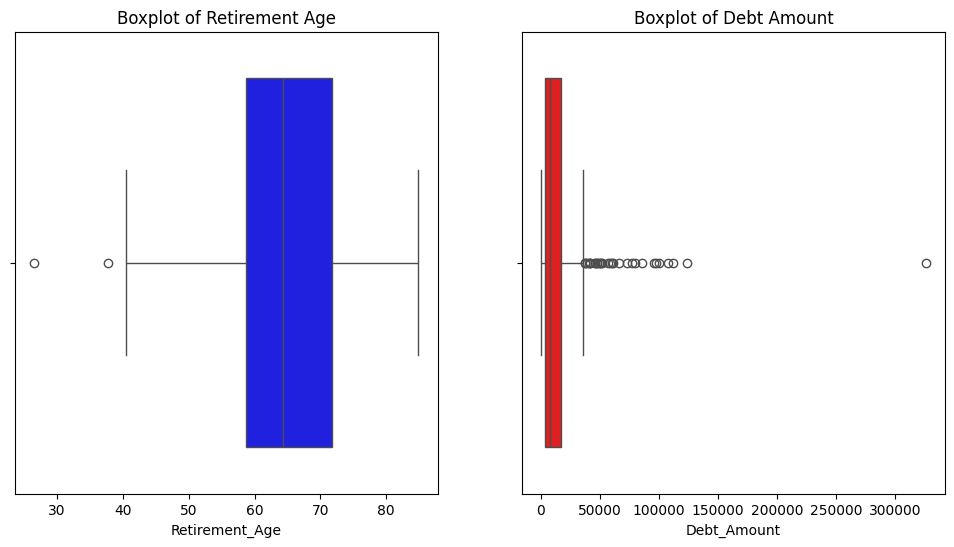

In [14]:
#@title outlier detection

plt.figure(figsize=(12,6))

# Boxplot for Retirement Age
plt.subplot(1,2,1)
sns.boxplot(x=data['Retirement_Age'], color="blue")
plt.title("Boxplot of Retirement Age")

# Boxplot for Debt Amount
plt.subplot(1,2,2)
sns.boxplot(x=data['Debt_Amount'], color="red")
plt.title("Boxplot of Debt Amount")

plt.show()

In [15]:
#@title Features & Loan Default Risk

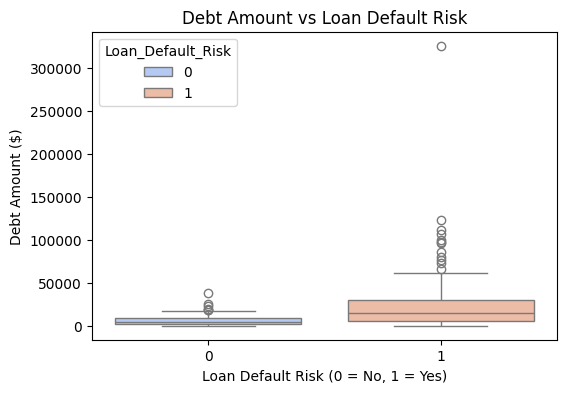

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["Loan_Default_Risk"], y=data["Debt_Amount"], palette="coolwarm",hue=data["Loan_Default_Risk"])
plt.title("Debt Amount vs Loan Default Risk")
plt.xlabel("Loan Default Risk (0 = No, 1 = Yes)")
plt.ylabel("Debt Amount ($)")
plt.show()

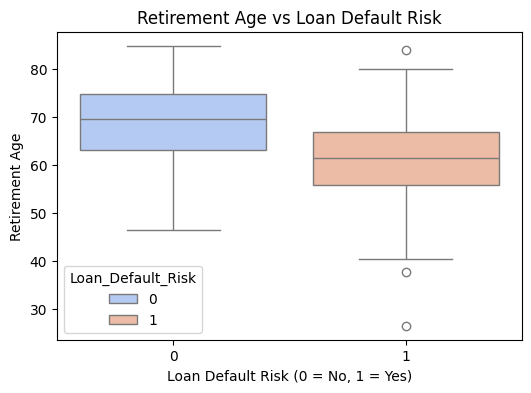

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["Loan_Default_Risk"], y=data["Retirement_Age"], palette="coolwarm",hue=data["Loan_Default_Risk"])
plt.title("Retirement Age vs Loan Default Risk")
plt.xlabel("Loan Default Risk (0 = No, 1 = Yes)")
plt.ylabel("Retirement Age")
plt.show()

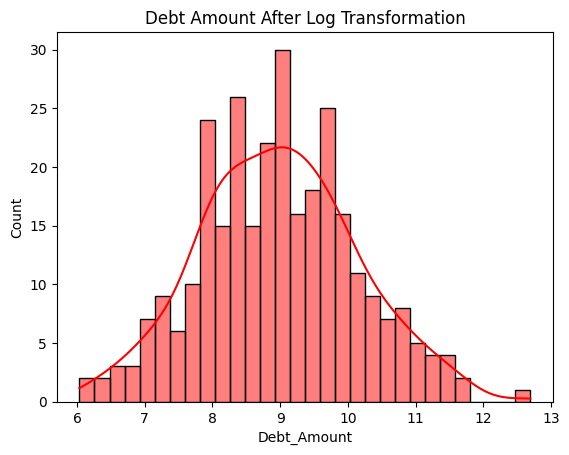

In [18]:
data['Debt_Amount'] = np.log1p(data['Debt_Amount'])  # log1p avoids log(0) errors

# Replot to check effect of transformation
sns.histplot(data['Debt_Amount'], bins=30, kde=True, color="red")
plt.title("Debt Amount After Log Transformation")
plt.show()

In [19]:
#@title Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Debt_Amount', 'Monthly_Savings', 'Retirement_Age']] = scaler.fit_transform(data[['Debt_Amount', 'Monthly_Savings', 'Retirement_Age']])


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Loan_Default_Risk', axis=1), data['Loan_Default_Risk'], test_size=0.2)

In [23]:
#@title smote

In [24]:
smote=SMOTE(random_state=42)
x_train_smote, y_train_smote=smote.fit_resample(x_train, y_train)

In [25]:
#@title SVM

In [26]:
from sklearn.svm import SVC

In [27]:
# Initialize SVM model (Using RBF Kernel)
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(x_train_smote, y_train_smote)

SVC(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Predictions on test data
y_pred=svc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [30]:
# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [31]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.91      1.00      0.95        31

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



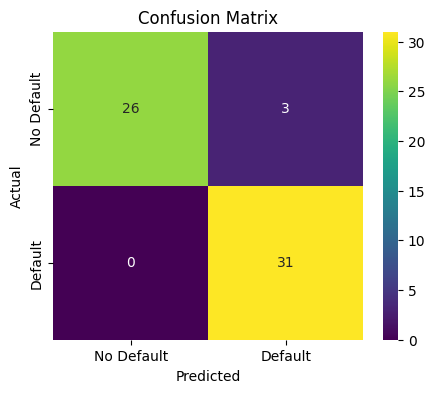

In [32]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="viridis", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()